## CCT College Dublin

**Assessment Cover Page**
_______________________________________________________________________


|**Module Title:** | Strategic Thinking |
|:---|---|
|**Assessment Title:** | CA2_Strategic Thinking_HDip |
|**Lecturer Name:** | James Garza |
|**Students Full Name:** | Miroslava Slavikova  |
|**Students Number:** | sba22382 |
|**Assessment Due Date:** | 17 December 2023  |
|**Date of Submission:** | 17 December 2023 |


In [1]:
# importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import ExtraTreesClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import VotingClassifier

import folium
from folium.plugins import HeatMap
import plotly.express as px

plt.style.use('fivethirtyeight')
%matplotlib inline
pd.set_option('display.max_columns', 32)

In [2]:
hotel_df = pd.read_csv("hotel_bookings.csv")

In [3]:
hotel_df.head()

hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  children  babies  \
0                        0                     0       2       0.0       0   
1                        0                     0       2       0.0       0   
2                        0                     1       1       0.0       0   
3                        0                     1       1       0.0       0   
4                        0                     2       2       0.0       0   

  meal country market_segment distribution_channel  is_repeated_guest  \
0   BB     PRT         Direct               Direct                  0   
1   BB     PRT         Direct               Direct                  0   
2   BB     GBR         Direct               Direct                  0   
3   BB     GBR      Corporate            Corporate                  0   
4   BB     GBR      Online TA                TA/TO                  0   

   previous_cancellations  previous_bookings_not_canceled reserved_room_type  \
0                       0                               0                  C   
1                       0                               0                  C   
2                       0                               0                  A   
3                       0                               0                  A   
4                       0                               0                  A   

  assigned_room_type  booking_changes deposit_type  agent  company  \
0                  C                3   No Deposit    NaN      NaN   
1                  C                4   No Deposit    NaN      NaN   
2                  C                0   No Deposit    NaN      NaN   
3                  A                0   No Deposit  304.0      NaN   
4                  A                0   No Deposit  240.0      NaN   

   days_in_waiting_list customer_type   adr  required_car_parking_spaces  \
0                     0     Transient   0.0                            0   
1                     0     Transient   0.0                            0   
2                     0     Transient  75.0                            0   
3                     0     Transient  75.0                            0   
4                     0     Transient  98.0                            0   

   total_of_special_requests reservation_status reservation_status_date  
0                          0          Check-Out              2015-07-01  
1                          0          Check-Out              2015-07-01  
2                          0          Check-Out              2015-07-02  
3                          0          Check-Out              2015-07-02  
4                          1          Check-Out              2015-07-03

In [4]:
hotel_df.shape

(119390, 32)

In [5]:
hotel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [6]:
hotel_df.describe()

is_canceled      lead_time  arrival_date_year  \
count  119390.000000  119390.000000      119390.000000   
mean        0.370416     104.011416        2016.156554   
std         0.482918     106.863097           0.707476   
min         0.000000       0.000000        2015.000000   
25%         0.000000      18.000000        2016.000000   
50%         0.000000      69.000000        2016.000000   
75%         1.000000     160.000000        2017.000000   
max         1.000000     737.000000        2017.000000   

       arrival_date_week_number  arrival_date_day_of_month  \
count             119390.000000              119390.000000   
mean                  27.165173                  15.798241   
std                   13.605138                   8.780829   
min                    1.000000                   1.000000   
25%                   16.000000                   8.000000   
50%                   28.000000                  16.000000   
75%                   38.000000                  23.000000   
max                   53.000000                  31.000000   

       stays_in_weekend_nights  stays_in_week_nights         adults  \
count            119390.000000         119390.000000  119390.000000   
mean                  0.927599              2.500302       1.856403   
std                   0.998613              1.908286       0.579261   
min                   0.000000              0.000000       0.000000   
25%                   0.000000              1.000000       2.000000   
50%                   1.000000              2.000000       2.000000   
75%                   2.000000              3.000000       2.000000   
max                  19.000000             50.000000      55.000000   

            children         babies  is_repeated_guest  \
count  119386.000000  119390.000000      119390.000000   
mean        0.103890       0.007949           0.031912   
std         0.398561       0.097436           0.175767   
min         0.000000       0.000000           0.000000   
25%         0.000000       0.000000           0.000000   
50%         0.000000       0.000000           0.000000   
75%         0.000000       0.000000           0.000000   
max        10.000000      10.000000           1.000000   

       previous_cancellations  previous_bookings_not_canceled  \
count           119390.000000                   119390.000000   
mean                 0.087118                        0.137097   
std                  0.844336                        1.497437   
min                  0.000000                        0.000000   
25%                  0.000000                        0.000000   
50%                  0.000000                        0.000000   
75%                  0.000000                        0.000000   
max                 26.000000                       72.000000   

       booking_changes          agent      company  days_in_waiting_list  \
count    119390.000000  103050.000000  6797.000000         119390.000000   
mean          0.221124      86.693382   189.266735              2.321149   
std           0.652306     110.774548   131.655015             17.594721   
min           0.000000       1.000000     6.000000              0.000000   
25%           0.000000       9.000000    62.000000              0.000000   
50%           0.000000      14.000000   179.000000              0.000000   
75%           0.000000     229.000000   270.000000              0.000000   
max          21.000000     535.000000   543.000000            391.000000   

                 adr  required_car_parking_spaces  total_of_special_requests  
count  119390.000000                119390.000000              119390.000000  
mean      101.831122                     0.062518                   0.571363  
std        50.535790                     0.245291                   0.792798  
min        -6.380000                     0.000000                   0.000000  
25%        69.290000                     0.000000                   0.000000  
50%        94.57500

In [7]:
hotel_df.describe(include=object)

hotel arrival_date_month    meal country market_segment  \
count       119390             119390  119390  118902         119390   
unique           2                 12       5     177              8   
top     City Hotel             August      BB     PRT      Online TA   
freq         79330              13877   92310   48590          56477   

       distribution_channel reserved_room_type assigned_room_type  \
count                119390             119390             119390   
unique                    5                 10                 12   
top                   TA/TO                  A                  A   
freq                  97870              85994              74053   

       deposit_type customer_type reservation_status reservation_status_date  
count        119390        119390             119390                  119390  
unique            3             4                  3                     926  
top      No Deposit     Transient          Check-Out              2015-10-21  
freq         104641         89613              75166                    1461

EDA

In [8]:
hotel_df.corr()

is_canceled  lead_time  arrival_date_year  \
is_canceled                        1.000000   0.293123           0.016660   
lead_time                          0.293123   1.000000           0.040142   
arrival_date_year                  0.016660   0.040142           1.000000   
arrival_date_week_number           0.008148   0.126871          -0.540561   
arrival_date_day_of_month         -0.006130   0.002268          -0.000221   
stays_in_weekend_nights           -0.001791   0.085671           0.021497   
stays_in_week_nights               0.024765   0.165799           0.030883   
adults                             0.060017   0.119519           0.029635   
children                           0.005048  -0.037622           0.054624   
babies                            -0.032491  -0.020915          -0.013192   
is_repeated_guest                 -0.084793  -0.124410           0.010341   
previous_cancellations             0.110133   0.086042          -0.119822   
previous_bookings_not_canceled    -0.057358  -0.073548           0.029218   
booking_changes                   -0.144381   0.000149           0.030872   
agent                             -0.083114  -0.069741           0.063457   
company                           -0.020642   0.151464           0.259095   
days_in_waiting_list               0.054186   0.170084          -0.056497   
adr                                0.047557  -0.063077           0.197580   
required_car_parking_spaces       -0.195498  -0.116451          -0.013684   
total_of_special_requests         -0.234658  -0.095712           0.108531   

                                arrival_date_week_number  \
is_canceled                                     0.008148   
lead_time                                       0.126871   
arrival_date_year                              -0.540561   
arrival_date_week_number                        1.000000   
arrival_date_day_of_month                       0.066809   
stays_in_weekend_nights                         0.018208   
stays_in_week_nights                            0.015558   
adults                                          0.025909   
children                                        0.005518   
babies                                          0.010395   
is_repeated_guest                              -0.030131   
previous_cancellations                          0.035501   
previous_bookings_not_canceled                 -0.020904   
booking_changes                                 0.005508   
agent                                          -0.031201   
company                                        -0.076760   
days_in_waiting_list                            0.022933   
adr                                             0.075791   
required_car_parking_spaces                     0.001920   
total_of_special_requests                       0.026149   

                                arrival_date_day_of_month  \
is_canceled                                     -0.006130   
lead_time                                        0.002268   
arrival_date_year                               -0.000221   
arrival_date_week_number                         0.066809   
arrival_date_day_of_month                        1.000000   
stays_in_weekend_nights                         -0.016354   
stays_in_week_nights                            -0.028174   
adults                                          -0.001566   
children                                         0.014544   
babies                                          -0.000230   
is_repeated_guest                               -0.006145   
previous_cancellations                          -0.027011   
previous_bookings_not_canceled                  -0.000300   
booking_changes                                  0.010613   
agent                                            0.001487   
company                                          0.044858   
days_in_waiting_list                             0.022728   
adr                                              0.0302

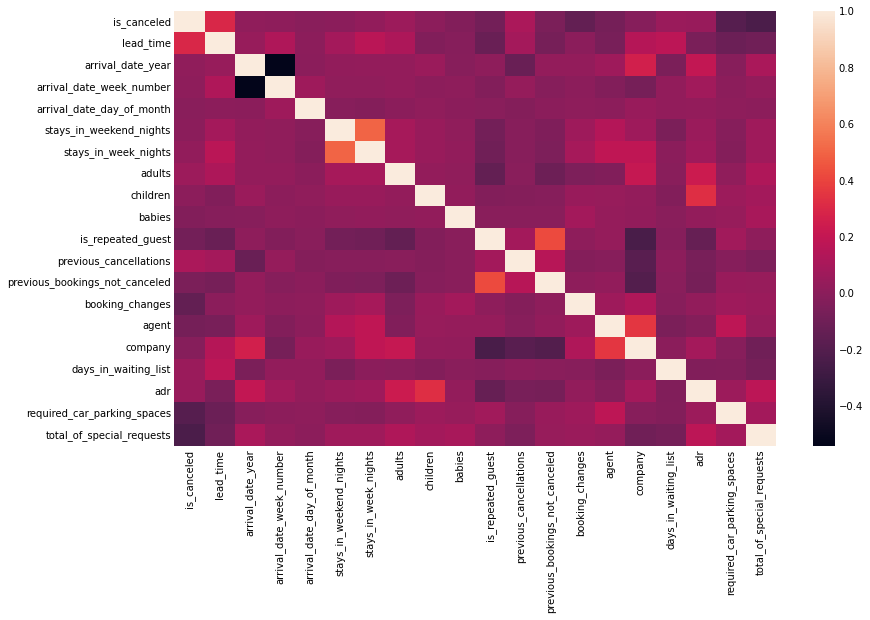

In [9]:
# Heatmaps
plt.figure(figsize=(12,8))
sns.heatmap(hotel_df.corr());

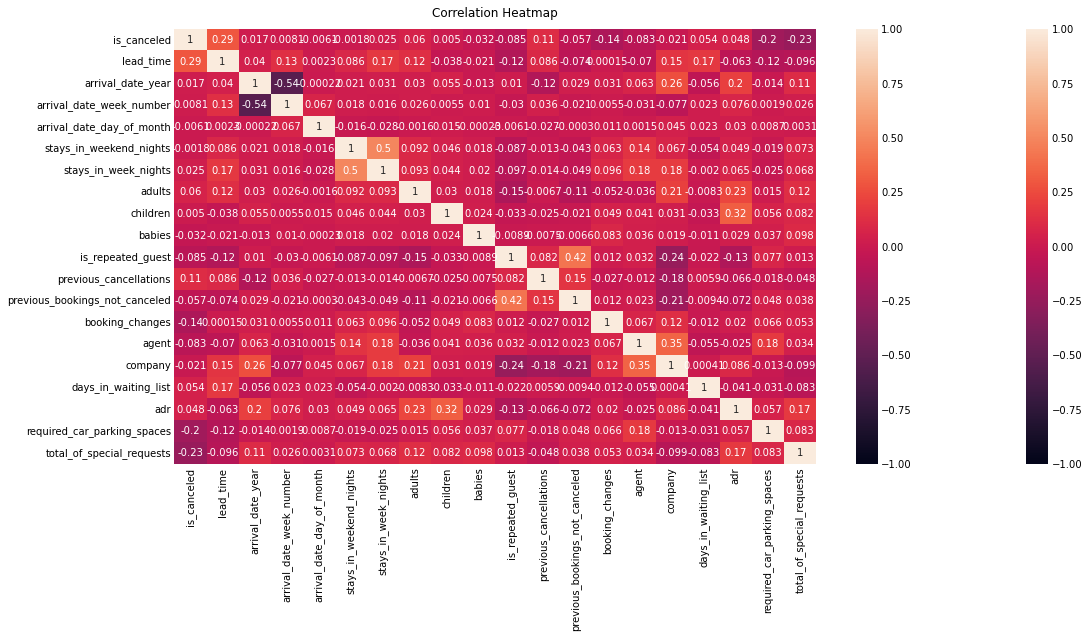

In [10]:
plt.figure(figsize=(16, 8))
heatmap = sns.heatmap(hotel_df.corr(), vmin=-1, vmax=1, annot=True)

heatmap = sns.heatmap(hotel_df.corr(), vmin=-1, vmax=1, annot=False)

heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

In [11]:
# counting sum of missing values 
hotel_df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [12]:
# filling null values
hotel_df = hotel_df.fillna(0)

In [13]:
hotel_df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

In [14]:
hotel_df.fillna(0, inplace = True)

<AxesSubplot:xlabel='lead_time', ylabel='adr'>

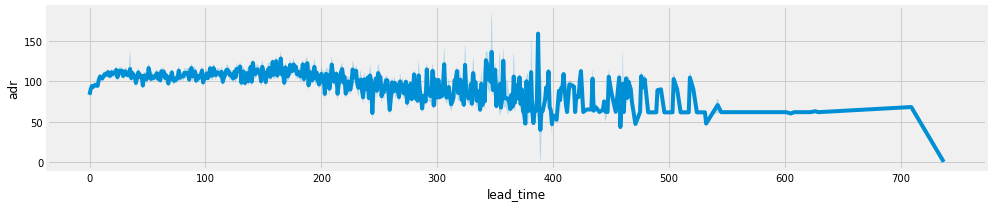

In [15]:
plt.figure(figsize=(15,3))
sns.lineplot(data=hotel_df,x='lead_time',y='adr')

Text(0.5, 0.98, 'Pairplot of First 10 Variables')

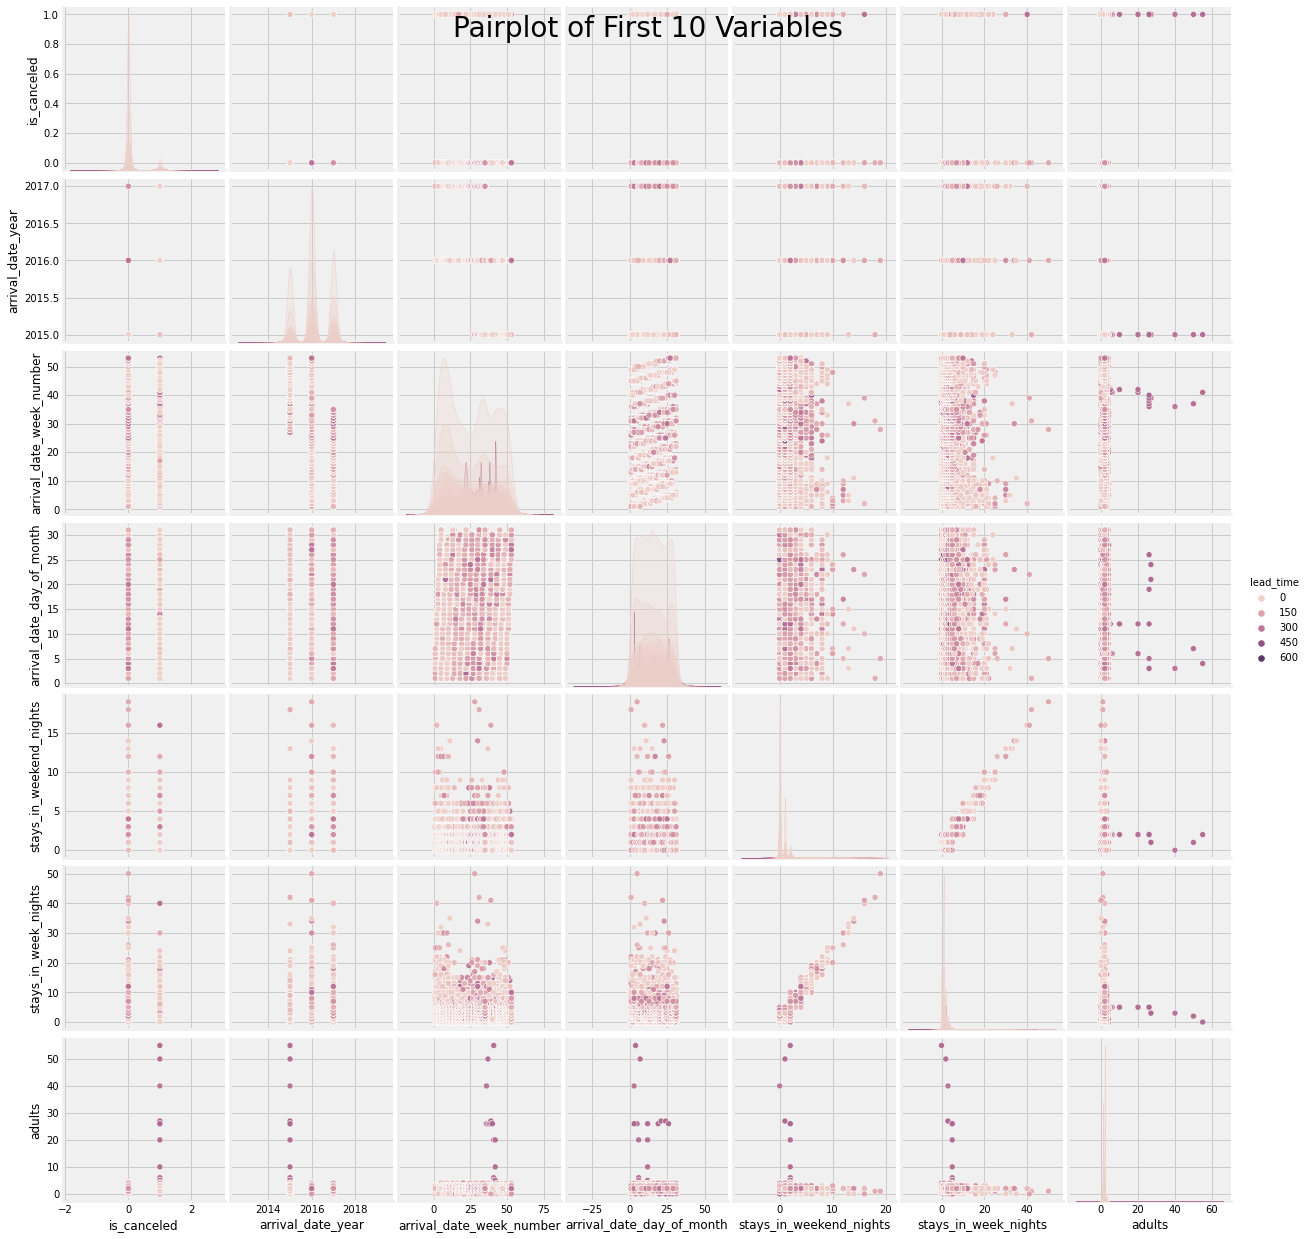

In [16]:
# Pairplot of First 10 Variables
variables = hotel_df.iloc[:, :10]
variables["lead_time"] = hotel_df["lead_time"]
sns.pairplot(variables, hue = "lead_time")
plt.suptitle("Pairplot of First 10 Variables", fontsize = 28)
#plt.show()

In [17]:
hotel_df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [18]:
# We can drop rows where adults, children and babies are zero at same time, a total of 180 rows
filter = (hotel_df.children == 0) & (hotel_df.adults == 0) & (hotel_df.babies == 0)
hotel_df[filter]

hotel  is_canceled  lead_time  arrival_date_year  \
2224    Resort Hotel            0          1               2015   
2409    Resort Hotel            0          0               2015   
3181    Resort Hotel            0         36               2015   
3684    Resort Hotel            0        165               2015   
3708    Resort Hotel            0        165               2015   
...              ...          ...        ...                ...   
115029    City Hotel            0        107               2017   
115091    City Hotel            0          1               2017   
116251    City Hotel            0         44               2017   
116534    City Hotel            0          2               2017   
117087    City Hotel            0        170               2017   

       arrival_date_month  arrival_date_week_number  \
2224              October                        41   
2409              October                        42   
3181             November                        47   
3684             December                        53   
3708             December                        53   
...                   ...                       ...   
115029               June                        26   
115091               June                        26   
116251               July                        28   
116534               July                        28   
117087               July                        30   

        arrival_date_day_of_month  stays_in_weekend_nights  \
2224                            6                        0   
2409                           12                        0   
3181                           20                        1   
3684                           30                        1   
3708                           30                        2   
...                           ...                      ...   
115029                         27                        0   
115091                         30                        0   
116251                         15                        1   
116534                         15                        2   
117087                         27                        0   

        stays_in_week_nights  adults  children  babies meal country  \
2224                       3       0       0.0       0   SC     PRT   
2409                       0       0       0.0       0   SC     PRT   
3181                       2       0       0.0       0   SC     ESP   
3684                       4       0       0.0       0   SC     PRT   
3708                       4       0       0.0       0   SC     PRT   
...                      ...     ...       ...     ...  ...     ...   
115029                     3       0       0.0       0   BB     CHE   
115091                     1       0       0.0       0   SC     PRT   
116251                     1       0       0.0       0   SC     SWE   
116534                     5       0       0.0       0   SC     RUS   
117087                     2       0       0.0       0   BB     BRA   

       market_segment distribution_channel  is_repeated_guest  \
2224        Corporate            Corporate                  0   
2409        Corporate            Corporate                  0   
3181           Groups                TA/TO                  0   
3684           Groups                TA/TO                  0   
3708           Groups                TA/TO                  0   
...               ...                  ...                ...   
115029      Online TA                TA/TO                  0   
115091  Complementary               Direct                  0   
116251      Online TA                TA/TO                  0   
116534      Online TA                TA/TO                  0   
117087  Offline TA/TO                TA/TO                  0   

        previous_cancellations  previous_bookings_not_canceled  \
2224                         0                               0   
2409                         0        

In [19]:
hotel_df = hotel_df[~filter]
hotel_df

hotel  is_canceled  lead_time  arrival_date_year  \
0       Resort Hotel            0        342               2015   
1       Resort Hotel            0        737               2015   
2       Resort Hotel            0          7               2015   
3       Resort Hotel            0         13               2015   
4       Resort Hotel            0         14               2015   
...              ...          ...        ...                ...   
119385    City Hotel            0         23               2017   
119386    City Hotel            0        102               2017   
119387    City Hotel            0         34               2017   
119388    City Hotel            0        109               2017   
119389    City Hotel            0        205               2017   

       arrival_date_month  arrival_date_week_number  \
0                    July                        27   
1                    July                        27   
2                    July                        27   
3                    July                        27   
4                    July                        27   
...                   ...                       ...   
119385             August                        35   
119386             August                        35   
119387             August                        35   
119388             August                        35   
119389             August                        35   

        arrival_date_day_of_month  stays_in_weekend_nights  \
0                               1                        0   
1                               1                        0   
2                               1                        0   
3                               1                        0   
4                               1                        0   
...                           ...                      ...   
119385                         30                        2   
119386                         31                        2   
119387                         31                        2   
119388                         31                        2   
119389                         29                        2   

        stays_in_week_nights  adults  children  babies meal country  \
0                          0       2       0.0       0   BB     PRT   
1                          0       2       0.0       0   BB     PRT   
2                          1       1       0.0       0   BB     GBR   
3                          1       1       0.0       0   BB     GBR   
4                          2       2       0.0       0   BB     GBR   
...                      ...     ...       ...     ...  ...     ...   
119385                     5       2       0.0       0   BB     BEL   
119386                     5       3       0.0       0   BB     FRA   
119387                     5       2       0.0       0   BB     DEU   
119388                     5       2       0.0       0   BB     GBR   
119389                     7       2       0.0       0   HB     DEU   

       market_segment distribution_channel  is_repeated_guest  \
0              Direct               Direct                  0   
1              Direct               Direct                  0   
2              Direct               Direct                  0   
3           Corporate            Corporate                  0   
4           Online TA                TA/TO                  0   
...               ...                  ...                ...   
119385  Offline TA/TO                TA/TO                  0   
119386      Online TA                TA/TO                  0   
119387      Online TA                TA/TO                  0   
119388      Online TA                TA/TO                  0   
119389      Online TA                TA/TO                  0   

        previous_cancellations  previous_bookings_not_canceled  \
0                            0                               0   
1                            0        

In [20]:
# Python Library used for visualizing geospatial data
import folium
from folium.plugins import HeatMap
import plotly.express as px


country = hotel_df.groupby('country').mean().reset_index()

basemap = folium.Map()

# Use 'country' as the location argument
guests_map = px.choropleth(country,
                            locations='country',  # Specify the column containing country names or codes
                            color='adr',  # Specify the column to represent in color
                            hover_name='country',  # Specify the column for hover information
                            title='Average Daily Rate (ADR) by Country')

# Display the Plotly Express map
guests_map.show()

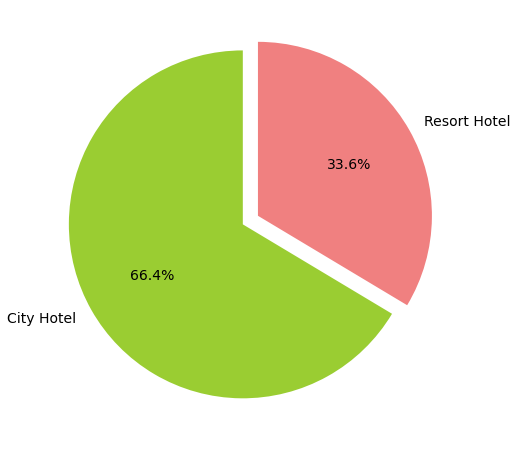

In [21]:
# Enlarging the pie chart
plt.rcParams['figure.figsize'] = 8,8

# Indexing labels. tolist() will convert the index to list for easy manipulation
labels = hotel_df['hotel'].value_counts().index.tolist()

# Convert value counts to list
sizes = hotel_df['hotel'].value_counts().tolist()

# As the name suggest, explode will determine how much each section is separated from each other
explode = (0, 0.1)

# Determine colour of pie chart
colors = ['yellowgreen', 'lightcoral']

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',startangle=90, textprops={'fontsize': 14})
plt.show()


<AxesSubplot:ylabel='is_canceled'>

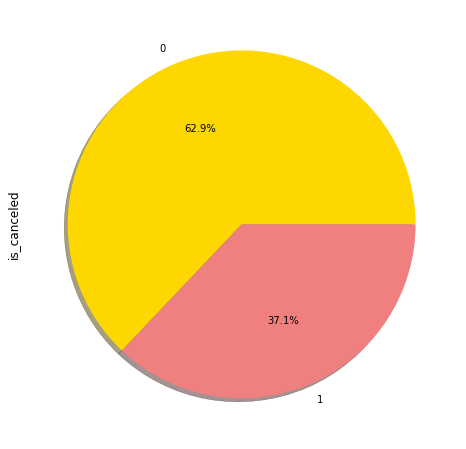

In [22]:
cols = ['gold', 'lightcoral']
hotel_df['is_canceled'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True, colors=cols)

## Exploratory Data Analysis (EDA)

In [23]:
!pip install fasteda

Defaulting to user installation because normal site-packages is not writeable


DataFrame Head:


hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  children  babies  \
0                        0                     0       2       0.0       0   
1                        0                     0       2       0.0       0   
2                        0                     1       1       0.0       0   

  meal country market_segment distribution_channel  is_repeated_guest  \
0   BB     PRT         Direct               Direct                  0   
1   BB     PRT         Direct               Direct                  0   
2   BB     GBR         Direct               Direct                  0   

   previous_cancellations  previous_bookings_not_canceled reserved_room_type  \
0                       0                               0                  C   
1                       0                               0                  C   
2                       0                               0                  A   

  assigned_room_type  booking_changes deposit_type  agent  company  \
0                  C                3   No Deposit    0.0      0.0   
1                  C                4   No Deposit    0.0      0.0   
2                  C                0   No Deposit    0.0      0.0   

   days_in_waiting_list customer_type   adr  required_car_parking_spaces  \
0                     0     Transient   0.0                            0   
1                     0     Transient   0.0                            0   
2                     0     Transient  75.0                            0   

   total_of_special_requests reservation_status reservation_status_date  
0                          0          Check-Out              2015-07-01  
1                          0          Check-Out              2015-07-01  
2                          0          Check-Out              2015-07-02

DataFrame Tail:


hotel  is_canceled  lead_time  arrival_date_year  \
119387  City Hotel            0         34               2017   
119388  City Hotel            0        109               2017   
119389  City Hotel            0        205               2017   

       arrival_date_month  arrival_date_week_number  \
119387             August                        35   
119388             August                        35   
119389             August                        35   

        arrival_date_day_of_month  stays_in_weekend_nights  \
119387                         31                        2   
119388                         31                        2   
119389                         29                        2   

        stays_in_week_nights  adults  children  babies meal country  \
119387                     5       2       0.0       0   BB     DEU   
119388                     5       2       0.0       0   BB     GBR   
119389                     7       2       0.0       0   HB     DEU   

       market_segment distribution_channel  is_repeated_guest  \
119387      Online TA                TA/TO                  0   
119388      Online TA                TA/TO                  0   
119389      Online TA                TA/TO                  0   

        previous_cancellations  previous_bookings_not_canceled  \
119387                       0                               0   
119388                       0                               0   
119389                       0                               0   

       reserved_room_type assigned_room_type  booking_changes deposit_type  \
119387                  D                  D                0   No Deposit   
119388                  A                  A                0   No Deposit   
119389                  A                  A                0   No Deposit   

        agent  company  days_in_waiting_list customer_type     adr  \
119387    9.0      0.0                     0     Transient  157.71   
119388   89.0      0.0                     0     Transient  104.40   
119389    9.0      0.0                     0     Transient  151.20   

        required_car_parking_spaces  total_of_special_requests  \
119387                            0                          4   
119388                            0                          0   
119389                            0                          2   

       reservation_status reservation_status_date  
119387          Check-Out              2017-09-07  
119388          Check-Out              2017-09-07  
119389          Check-Out              2017-09-07

----------------------------------------------------------------------------------------------------
Missing values:


----------------------------------------------------------------------------------------------------
Shape of DataFrame:

(119210, 32)

----------------------------------------------------------------------------------------------------
DataFrame Info:

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119210 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119210 non-null  object 
 1   is_canceled                     119210 non-null  int64  
 2   lead_time                       119210 non-null  int64  
 3   arrival_date_year               119210 non-null  int64  
 4   arrival_date_month              119210 non-null  object 
 5   arrival_date_week_number        119210 non-null  int64  
 6   arrival_date_day_of_month       119210 non-null  int64  
 7   stays_in_weekend_nights         119210 non-null  int64  
 8   stays_in_w

----------------------------------------------------------------------------------------------------
DataFrame Correlation:



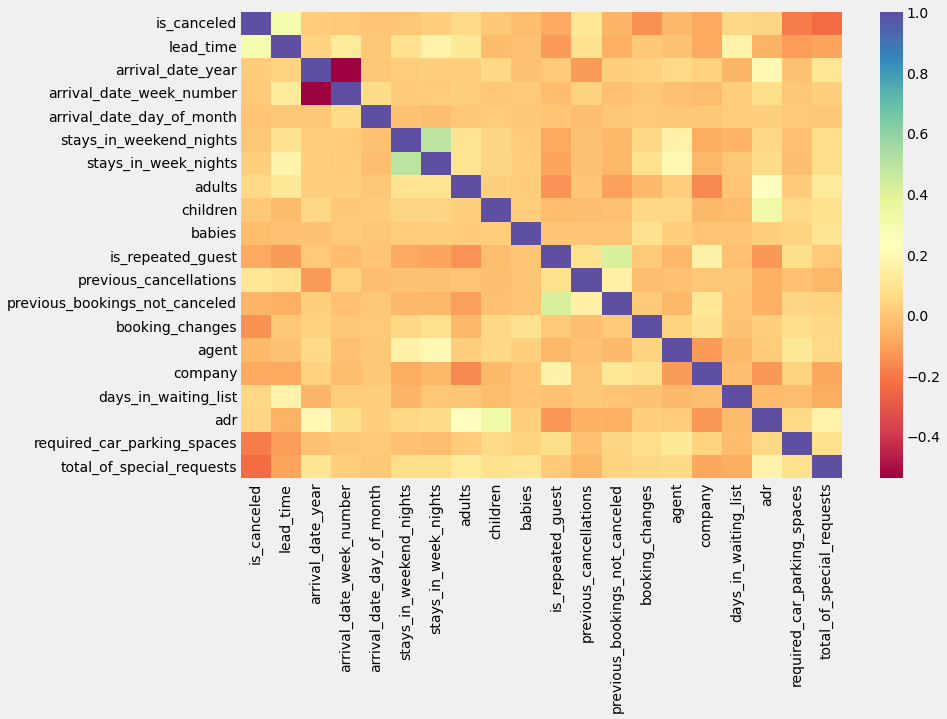

----------------------------------------------------------------------------------------------------
Histogram(s) & Boxplot(s):



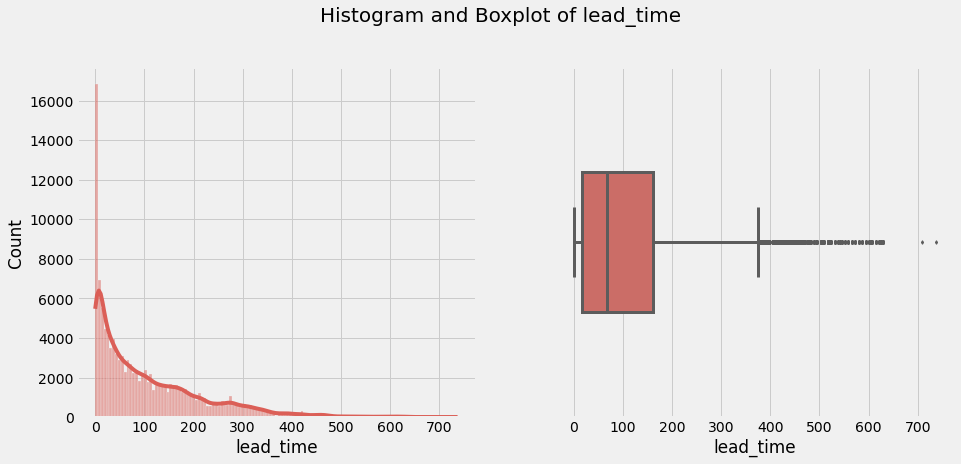

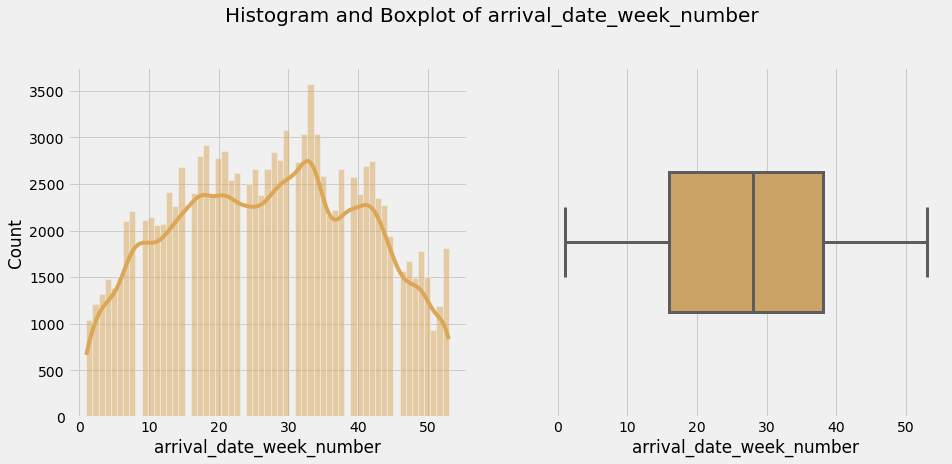

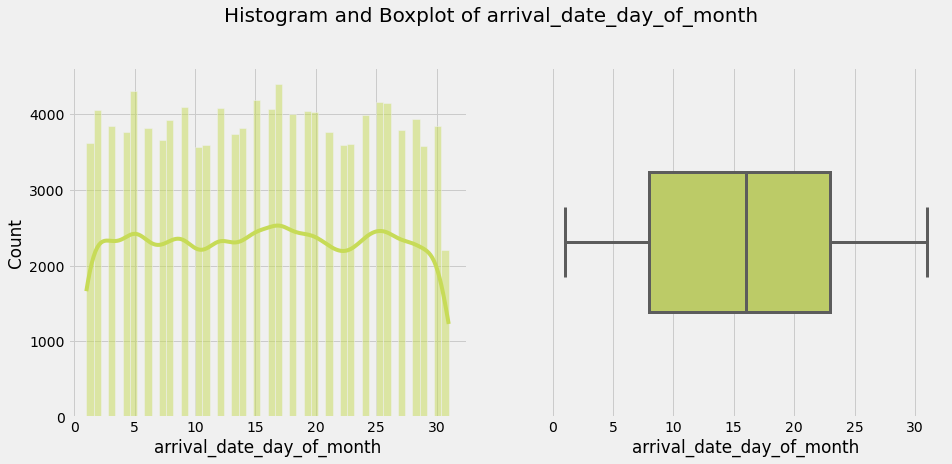

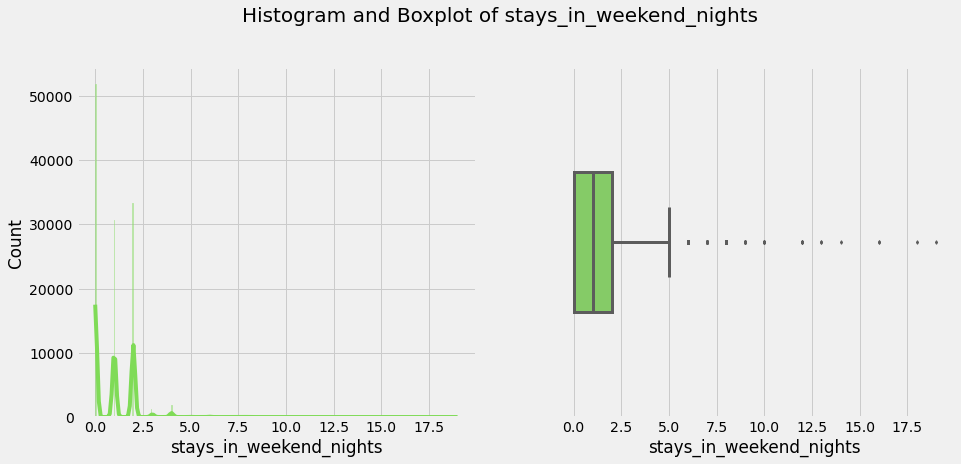

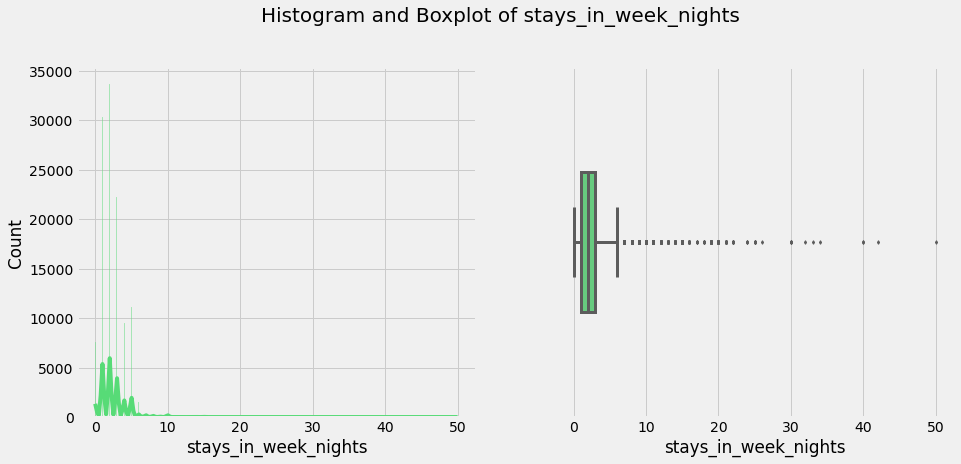

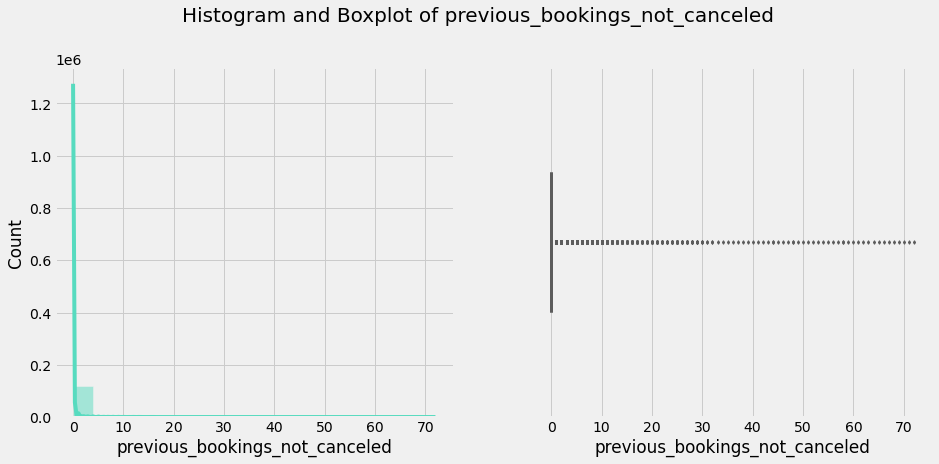

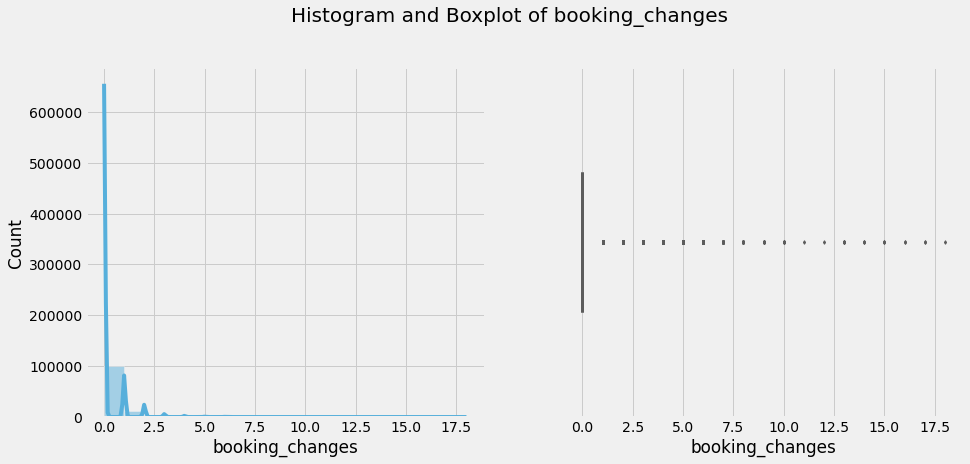

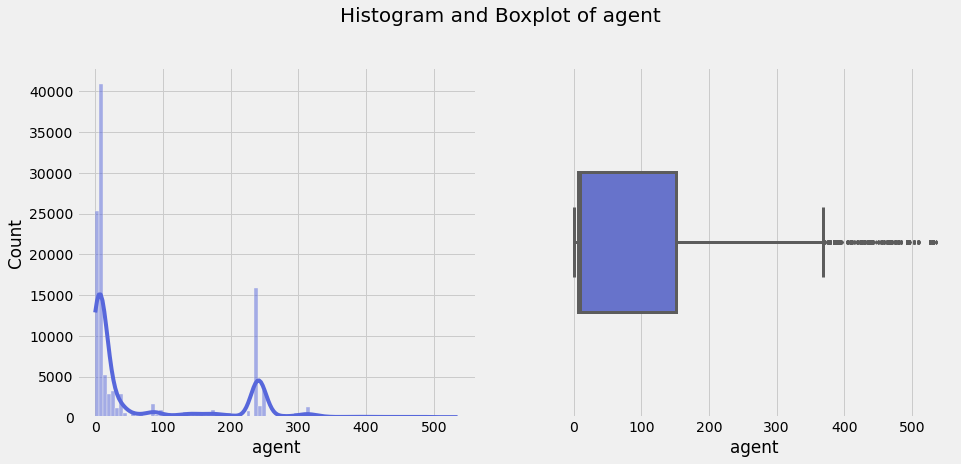

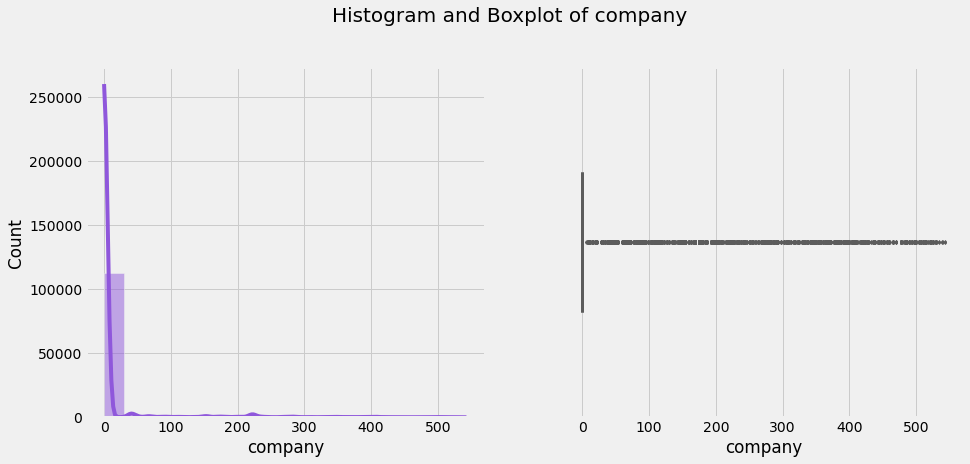

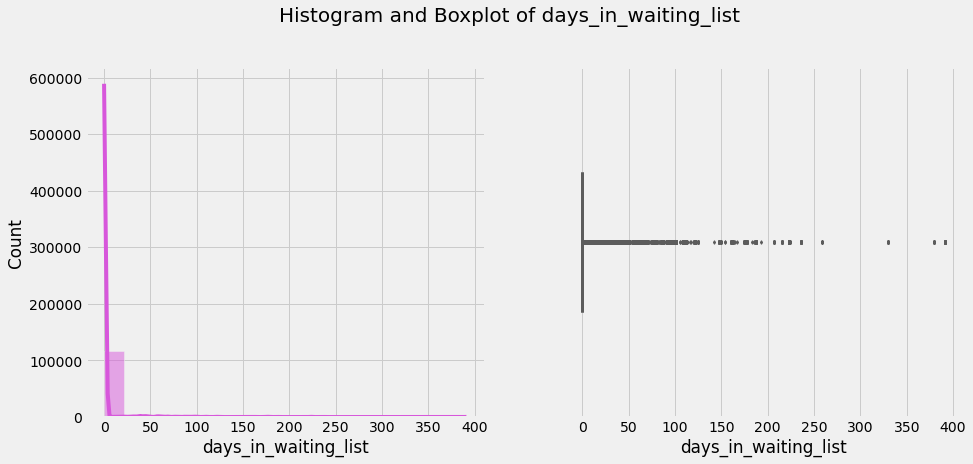

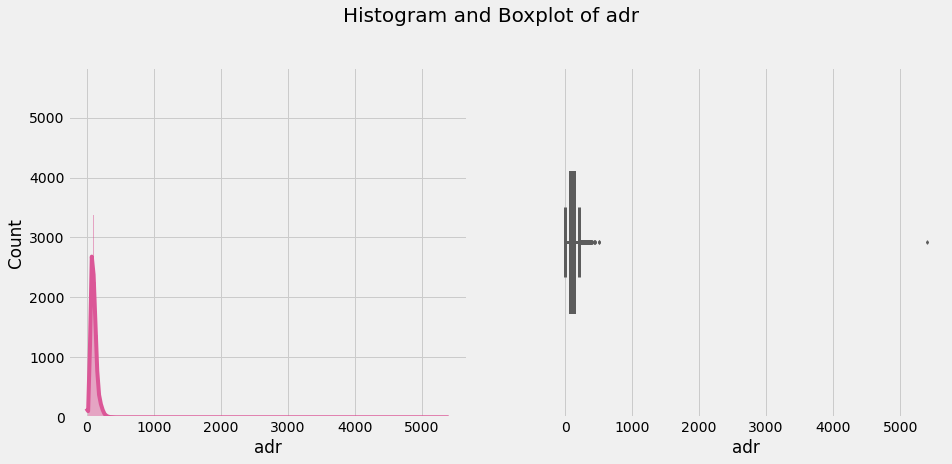

----------------------------------------------------------------------------------------------------
Countplot(s):



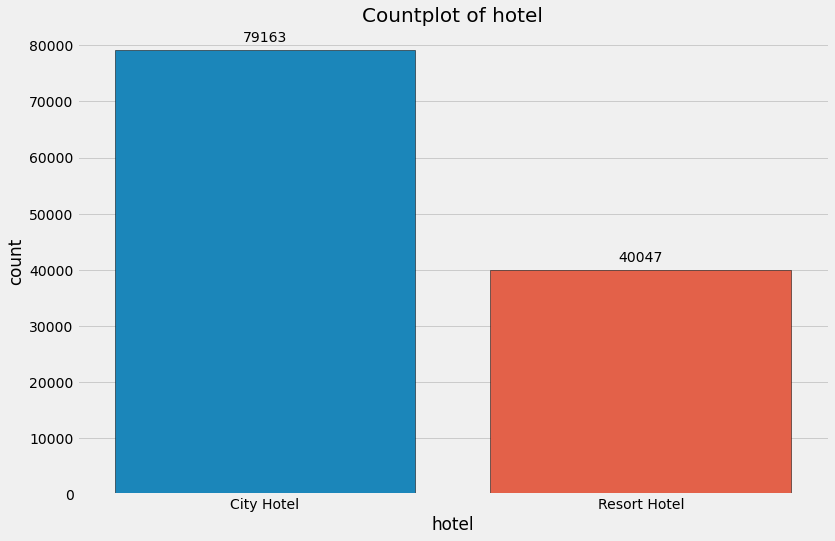

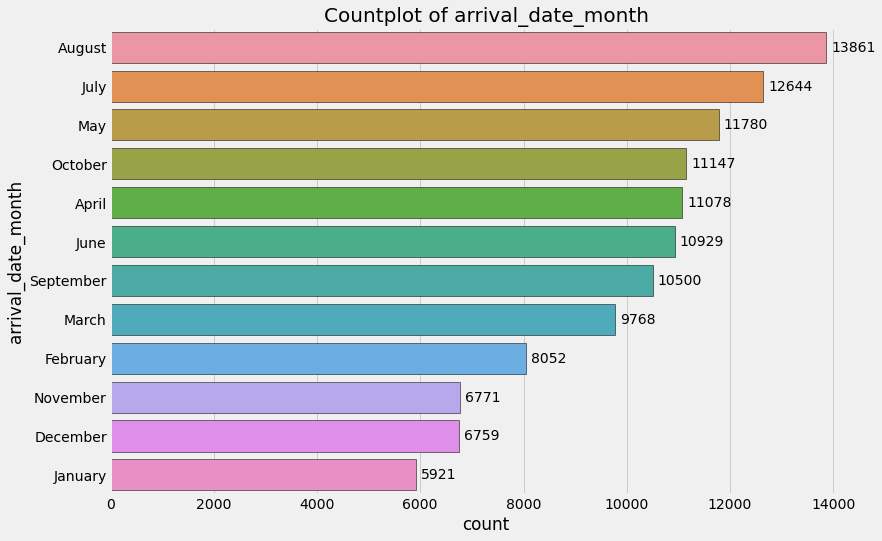

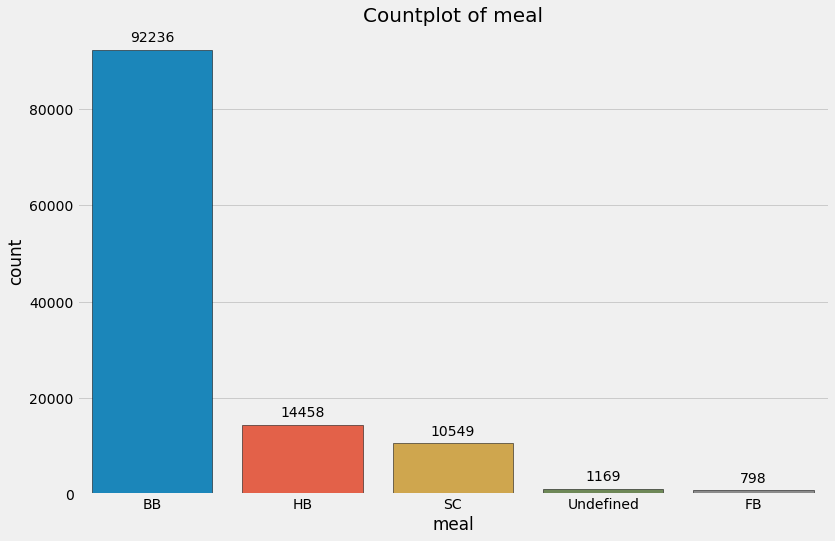

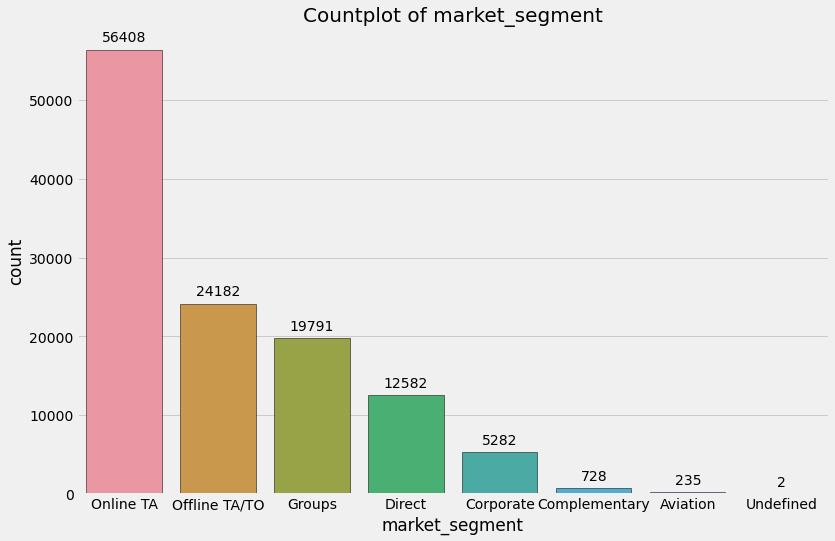

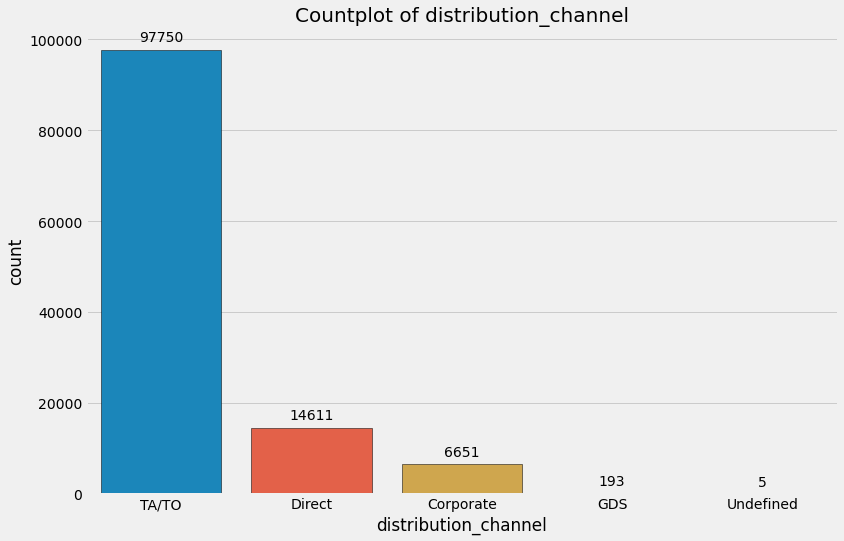

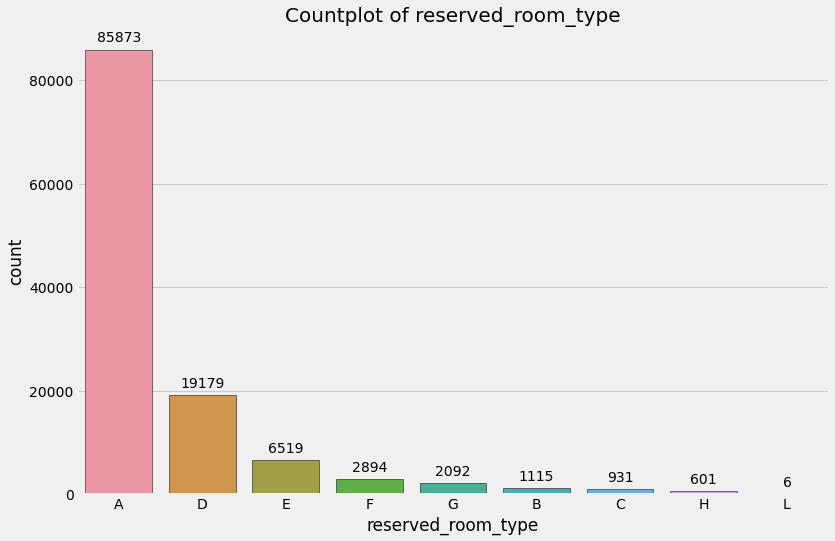

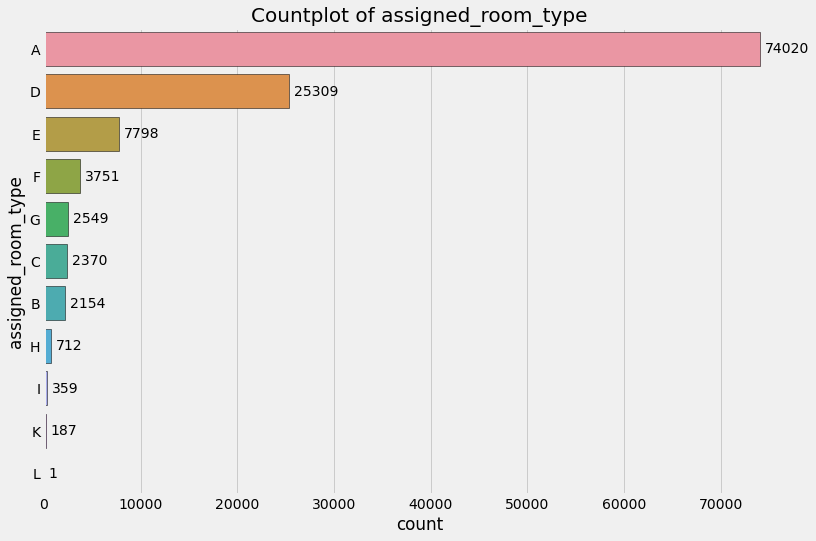

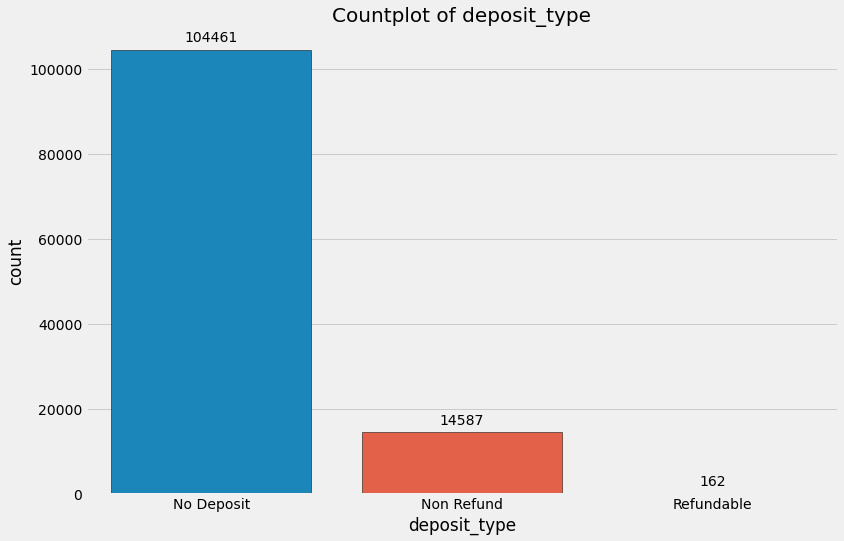

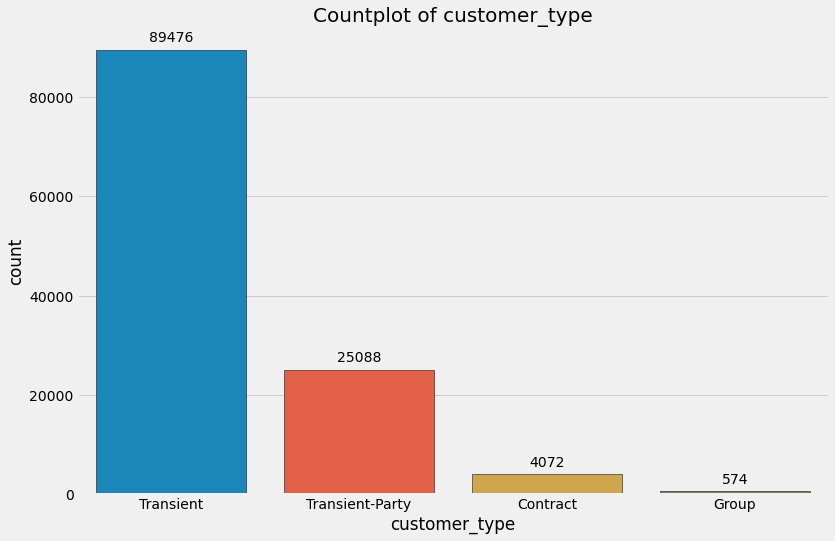

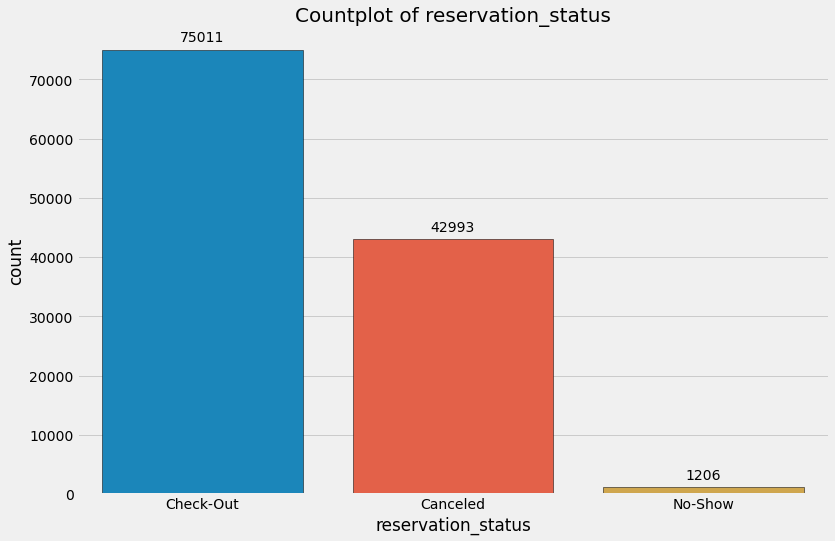

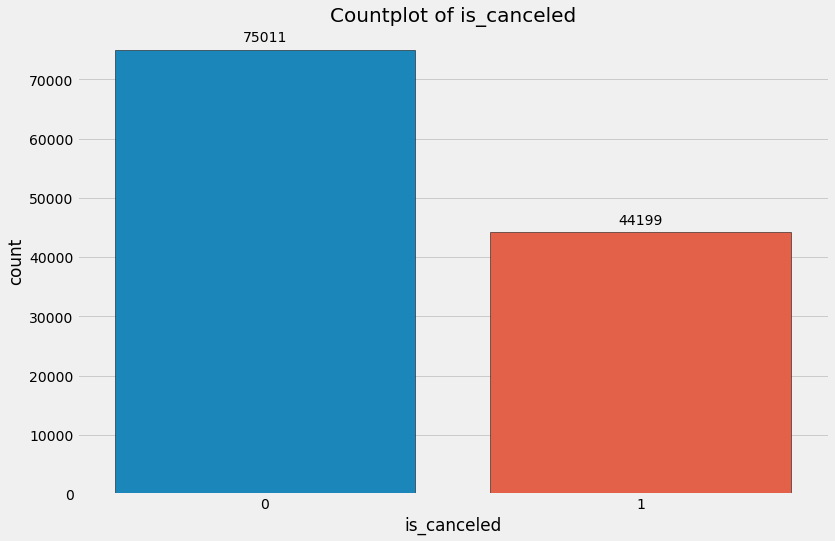

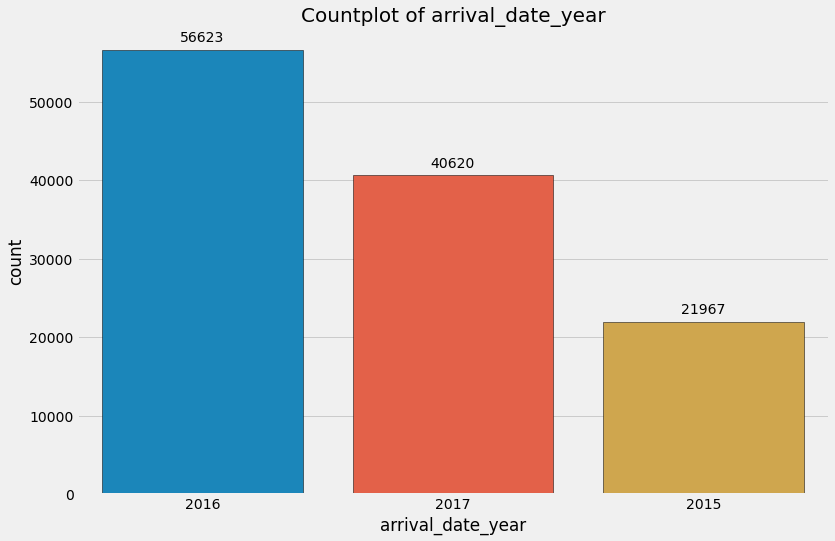

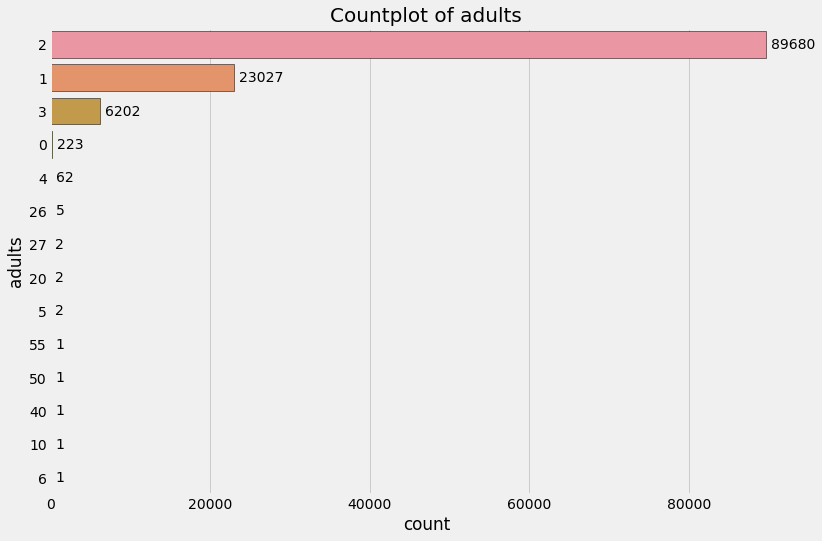

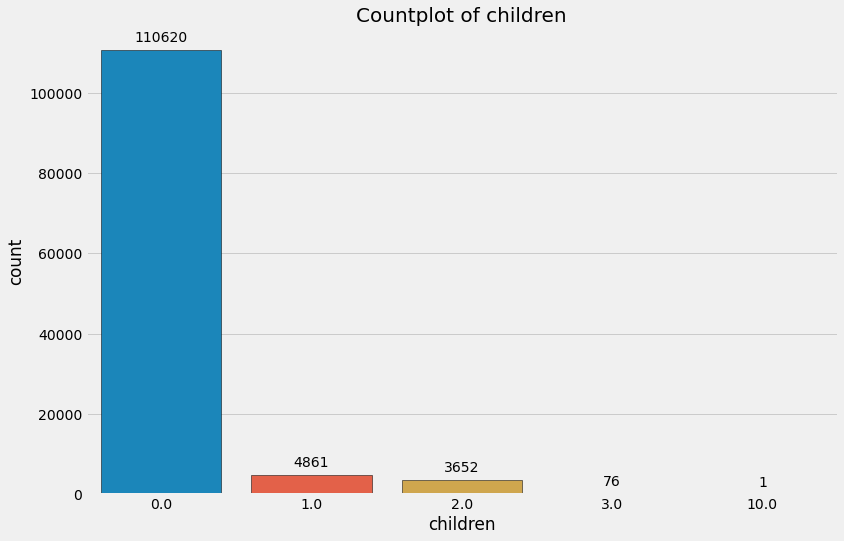

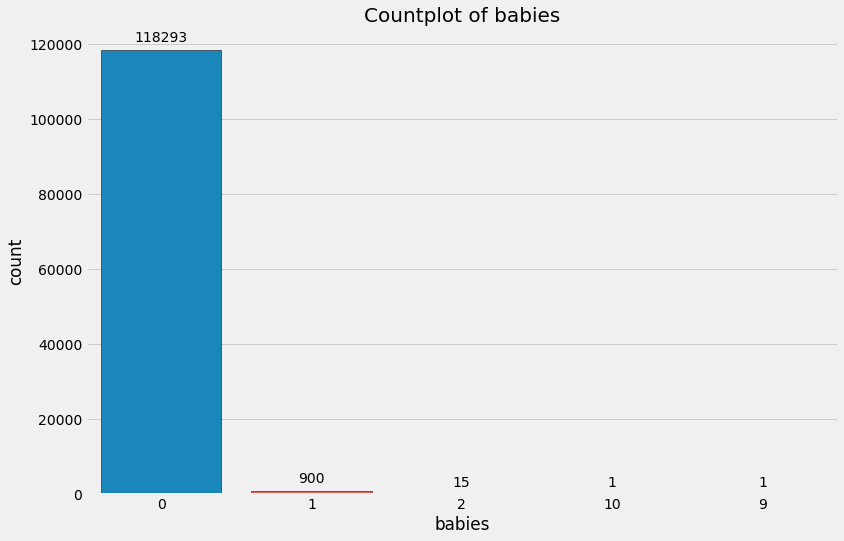

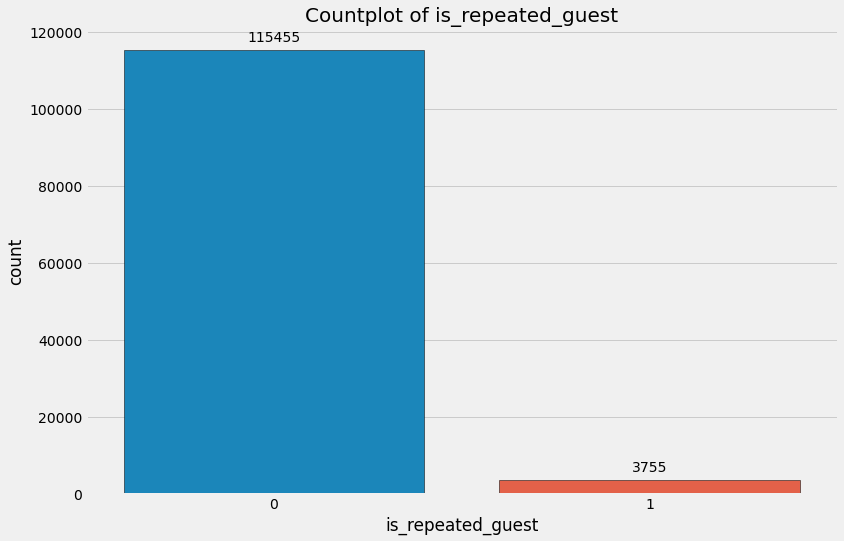

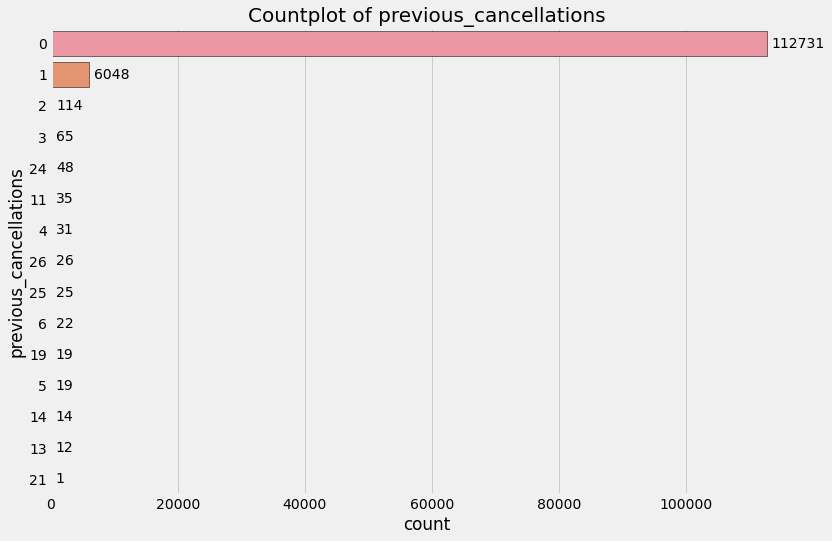

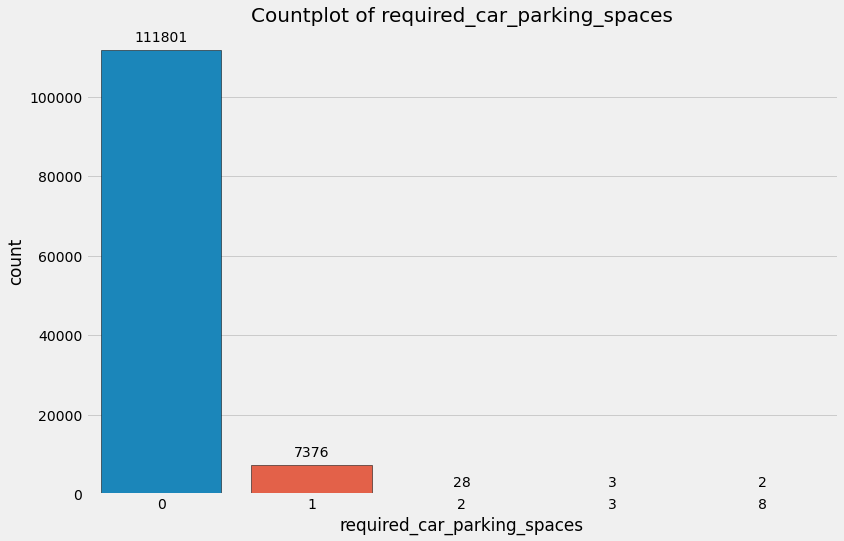

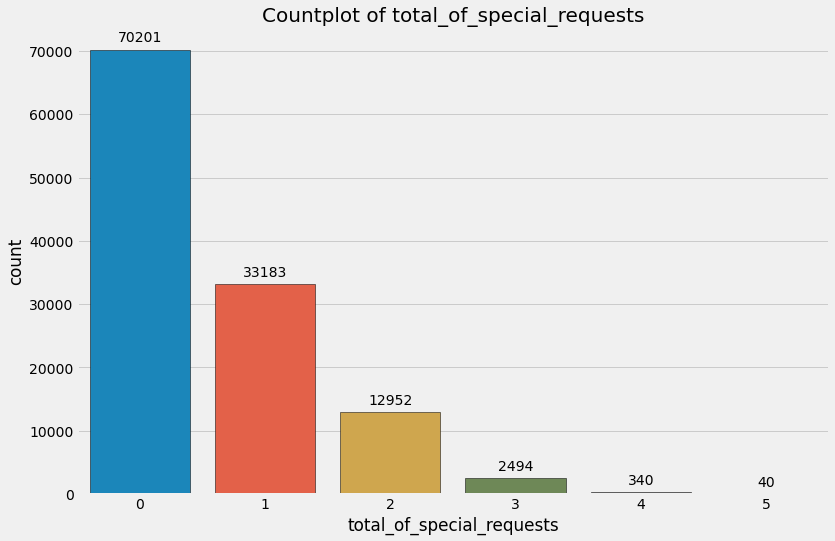

In [24]:
from fasteda import fast_eda
fast_eda(hotel_df)

In [25]:
# Guest arrivals by country 
not_cancelled = hotel_df[hotel_df['is_canceled'] == 0]

In [26]:
country_wise = not_cancelled['country'].value_counts().reset_index()
country_wise.columns = ['country', 'no_of_guests']
country_wise

country  no_of_guests
0       PRT         20977
1       GBR          9668
2       FRA          8468
3       ESP          6383
4       DEU          6067
..      ...           ...
161     BHR             1
162     DJI             1
163     MLI             1
164     NPL             1
165     FRO             1

[166 rows x 2 columns]

In [27]:
data_city = hotel_df[(hotel_df['hotel'] == 'City Hotel') & (hotel_df['is_canceled'] == 0)]
data_resort = hotel_df[(hotel_df['hotel'] == 'Resort Hotel') & (hotel_df['is_canceled'] == 0)]

In [28]:
city_hotel=data_city.groupby(['arrival_date_month'])['adr'].mean().reset_index()
city_hotel

arrival_date_month         adr
0               April  111.962267
1              August  118.674598
2            December   88.401855
3            February   86.520062
4             January   82.330983
5                July  115.818019
6                June  117.874360
7               March   90.658533
8                 May  120.669827
9            November   86.946592
10            October  102.004672
11          September  112.776582

In [29]:
resort_hotel = data_resort.groupby(['arrival_date_month'])['adr'].mean().reset_index()
resort_hotel

arrival_date_month         adr
0               April   75.867816
1              August  181.205892
2            December   68.410104
3            February   54.147478
4             January   48.761125
5                July  150.122528
6                June  107.974850
7               March   57.056838
8                 May   76.657558
9            November   48.706289
10            October   61.775449
11          September   96.416860

In [30]:
final_hotel = resort_hotel.merge(city_hotel, on = 'arrival_date_month')
final_hotel.columns = ['month', 'price_for_resort', 'price_for_city_hotel']
final_hotel

month  price_for_resort  price_for_city_hotel
0       April         75.867816            111.962267
1      August        181.205892            118.674598
2    December         68.410104             88.401855
3    February         54.147478             86.520062
4     January         48.761125             82.330983
5        July        150.122528            115.818019
6        June        107.974850            117.874360
7       March         57.056838             90.658533
8         May         76.657558            120.669827
9    November         48.706289             86.946592
10    October         61.775449            102.004672
11  September         96.416860            112.776582

In [31]:
!pip install sort-dataframeby-monthorweek

!pip install sorted-months-weekdays

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [32]:
import sort_dataframeby_monthorweek as sd

def sort_month(df, column_name):
    return sd.Sort_Dataframeby_Month(df, column_name)

In [33]:
final_prices = sort_month(final_hotel, 'month')
final_prices

month  price_for_resort  price_for_city_hotel
0     January         48.761125             82.330983
1    February         54.147478             86.520062
2       March         57.056838             90.658533
3       April         75.867816            111.962267
4         May         76.657558            120.669827
5        June        107.974850            117.874360
6        July        150.122528            115.818019
7      August        181.205892            118.674598
8   September         96.416860            112.776582
9     October         61.775449            102.004672
10   November         48.706289             86.946592
11   December         68.410104             88.401855

In [34]:
plt.figure(figsize = (17, 8))

px.line(final_prices, x = 'month', y = ['price_for_resort','price_for_city_hotel'],
        title = 'Room price per night over the Months', template = 'plotly_dark')


<Figure size 1224x576 with 0 Axes>

In [35]:
resort_guests = data_resort['arrival_date_month'].value_counts().reset_index()
resort_guests.columns=['month','no of guests']
resort_guests

month  no of guests
0      August          3257
1        July          3137
2     October          2575
3       March          2571
4       April          2550
5         May          2535
6    February          2308
7   September          2102
8        June          2037
9    December          2014
10   November          1975
11    January          1866

In [36]:
# Hotel Stay

filter = hotel_df['is_canceled'] == 0
data = hotel_df[filter]
data.head()

hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  children  babies  \
0                        0                     0       2       0.0       0   
1                        0                     0       2       0.0       0   
2                        0                     1       1       0.0       0   
3                        0                     1       1       0.0       0   
4                        0                     2       2       0.0       0   

  meal country market_segment distribution_channel  is_repeated_guest  \
0   BB     PRT         Direct               Direct                  0   
1   BB     PRT         Direct               Direct                  0   
2   BB     GBR         Direct               Direct                  0   
3   BB     GBR      Corporate            Corporate                  0   
4   BB     GBR      Online TA                TA/TO                  0   

   previous_cancellations  previous_bookings_not_canceled reserved_room_type  \
0                       0                               0                  C   
1                       0                               0                  C   
2                       0                               0                  A   
3                       0                               0                  A   
4                       0                               0                  A   

  assigned_room_type  booking_changes deposit_type  agent  company  \
0                  C                3   No Deposit    0.0      0.0   
1                  C                4   No Deposit    0.0      0.0   
2                  C                0   No Deposit    0.0      0.0   
3                  A                0   No Deposit  304.0      0.0   
4                  A                0   No Deposit  240.0      0.0   

   days_in_waiting_list customer_type   adr  required_car_parking_spaces  \
0                     0     Transient   0.0                            0   
1                     0     Transient   0.0                            0   
2                     0     Transient  75.0                            0   
3                     0     Transient  75.0                            0   
4                     0     Transient  98.0                            0   

   total_of_special_requests reservation_status reservation_status_date  
0                          0          Check-Out              2015-07-01  
1                          0          Check-Out              2015-07-01  
2                          0          Check-Out              2015-07-02  
3                          0          Check-Out              2015-07-02  
4                          1          Check-Out              2015-07-03

In [37]:
data['total_nights'] = data['stays_in_weekend_nights'] + data['stays_in_week_nights']
data.head()

hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  children  babies  \
0                        0                     0       2       0.0       0   
1                        0                     0       2       0.0       0   
2                        0                     1       1       0.0       0   
3                        0                     1       1       0.0       0   
4                        0                     2       2       0.0       0   

  meal country market_segment distribution_channel  is_repeated_guest  \
0   BB     PRT         Direct               Direct                  0   
1   BB     PRT         Direct               Direct                  0   
2   BB     GBR         Direct               Direct                  0   
3   BB     GBR      Corporate            Corporate                  0   
4   BB     GBR      Online TA                TA/TO                  0   

   previous_cancellations  previous_bookings_not_canceled reserved_room_type  \
0                       0                               0                  C   
1                       0                               0                  C   
2                       0                               0                  A   
3                       0                               0                  A   
4                       0                               0                  A   

  assigned_room_type  booking_changes deposit_type  agent  company  \
0                  C                3   No Deposit    0.0      0.0   
1                  C                4   No Deposit    0.0      0.0   
2                  C                0   No Deposit    0.0      0.0   
3                  A                0   No Deposit  304.0      0.0   
4                  A                0   No Deposit  240.0      0.0   

   days_in_waiting_list customer_type   adr  required_car_parking_spaces  \
0                     0     Transient   0.0                            0   
1                     0     Transient   0.0                            0   
2                     0     Transient  75.0                            0   
3                     0     Transient  75.0                            0   
4                     0     Transient  98.0                            0   

   total_of_special_requests reservation_status reservation_status_date  \
0                          0          Check-Out              2015-07-01   
1                          0          Check-Out              2015-07-01   
2                          0          Check-Out              2015-07-02   
3                          0          Check-Out              2015-07-02   
4                          1          Check-Out              2015-07-03   

   total_nights  
0             0  
1             0  
2             1  
3             1  
4             2

In [38]:
stay = data.groupby(['total_nights', 'hotel']).agg('count').reset_index()
stay = stay.iloc[:, :3]
stay = stay.rename(columns={'is_canceled':'Number of stays'})
stay


total_nights         hotel  Number of stays
0              0    City Hotel              251
1              0  Resort Hotel              371
2              1    City Hotel             9155
3              1  Resort Hotel             6579
4              2    City Hotel            10983
..           ...           ...              ...
57            46  Resort Hotel                1
58            48    City Hotel                1
59            56  Resort Hotel                1
60            60  Resort Hotel                1
61            69  Resort Hotel                1

[62 rows x 3 columns]

In [39]:
px.bar(data_frame = stay, x = 'total_nights', y = 'Number of stays', color = 'hotel', barmode = 'group',
        template = 'plotly_dark')

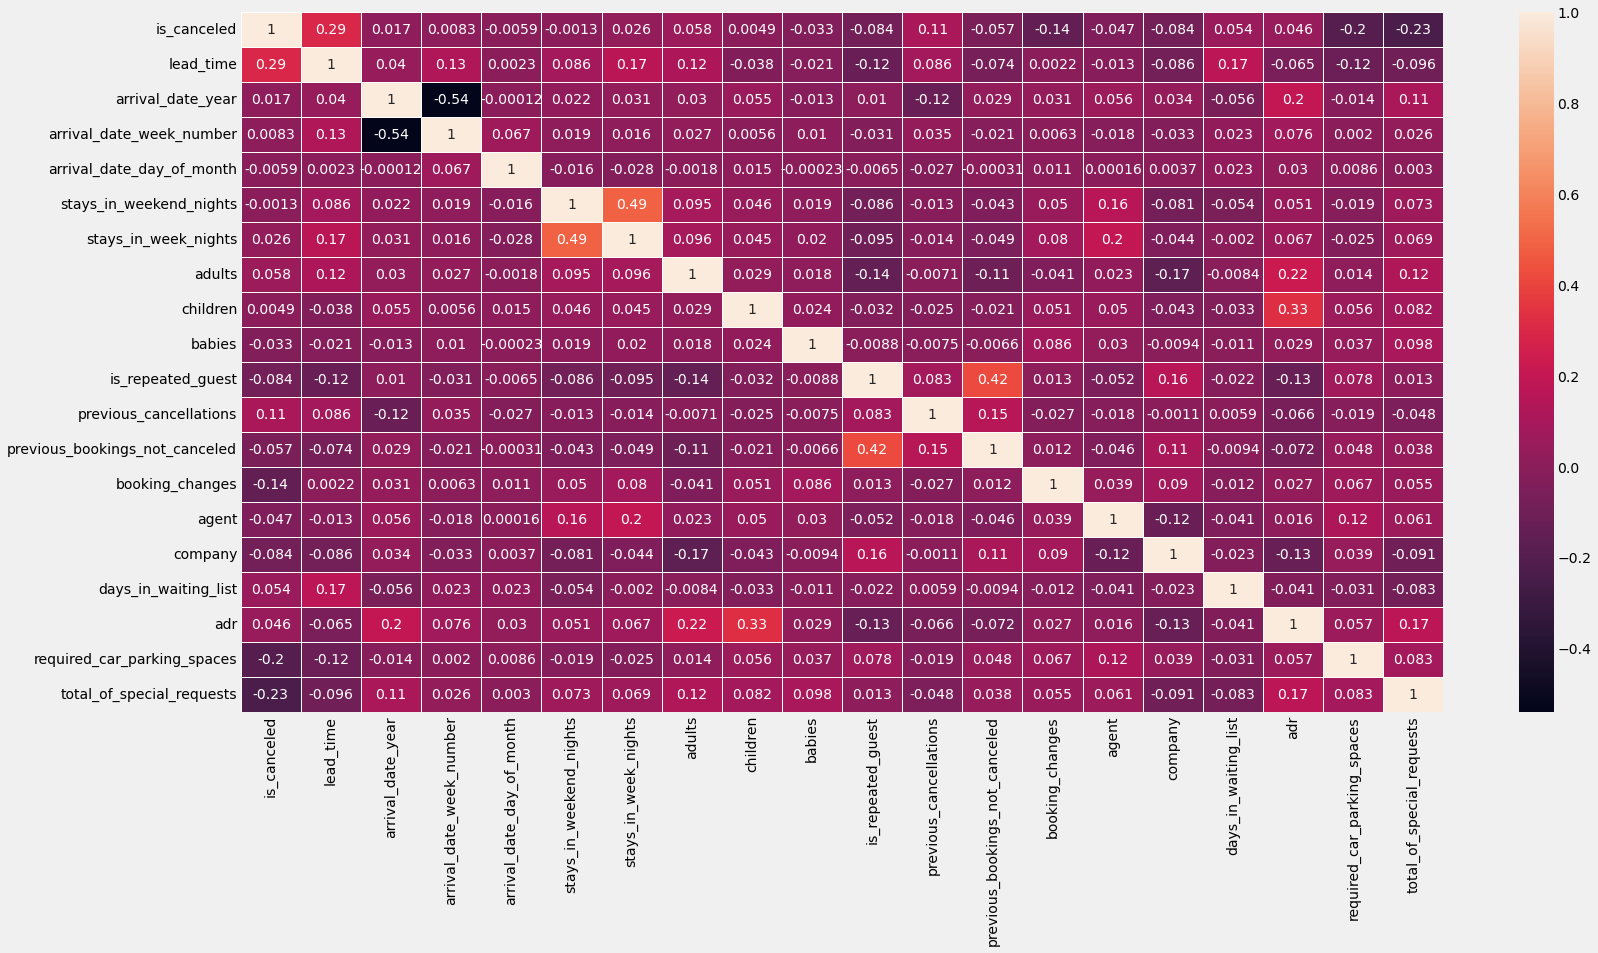

In [40]:
plt.figure(figsize = (24, 12))
corr = hotel_df.corr()
sns.heatmap(corr, annot = True, linewidths = 1)
plt.show()

In [41]:
correlation = hotel_df.corr()['is_canceled'].abs().sort_values(ascending = False)
correlation

is_canceled                       1.000000
lead_time                         0.292876
total_of_special_requests         0.234877
required_car_parking_spaces       0.195701
booking_changes                   0.144832
previous_cancellations            0.110139
is_repeated_guest                 0.083745
company                           0.083594
adults                            0.058182
previous_bookings_not_canceled    0.057365
days_in_waiting_list              0.054301
agent                             0.046770
adr                               0.046492
babies                            0.032569
stays_in_week_nights              0.025542
arrival_date_year                 0.016622
arrival_date_week_number          0.008315
arrival_date_day_of_month         0.005948
children                          0.004851
stays_in_weekend_nights           0.001323
Name: is_canceled, dtype: float64

In [42]:
# creating numerical and categorical dataframes

cat_cols = [col for col in hotel_df.columns if hotel_df[col].dtype == 'O']
cat_cols


['hotel',
 'arrival_date_month',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'reserved_room_type',
 'assigned_room_type',
 'deposit_type',
 'customer_type',
 'reservation_status',
 'reservation_status_date']

In [43]:
cat_df = hotel_df[cat_cols]
cat_df.head()


hotel arrival_date_month meal country market_segment  \
0  Resort Hotel               July   BB     PRT         Direct   
1  Resort Hotel               July   BB     PRT         Direct   
2  Resort Hotel               July   BB     GBR         Direct   
3  Resort Hotel               July   BB     GBR      Corporate   
4  Resort Hotel               July   BB     GBR      Online TA   

  distribution_channel reserved_room_type assigned_room_type deposit_type  \
0               Direct                  C                  C   No Deposit   
1               Direct                  C                  C   No Deposit   
2               Direct                  A                  C   No Deposit   
3            Corporate                  A                  A   No Deposit   
4                TA/TO                  A                  A   No Deposit   

  customer_type reservation_status reservation_status_date  
0     Transient          Check-Out              2015-07-01  
1     Transient          Check-Out              2015-07-01  
2     Transient          Check-Out              2015-07-02  
3     Transient          Check-Out              2015-07-02  
4     Transient          Check-Out              2015-07-03

In [44]:
cat_df['reservation_status_date'] = pd.to_datetime(cat_df['reservation_status_date'])

cat_df['year'] = cat_df['reservation_status_date'].dt.year
cat_df['month'] = cat_df['reservation_status_date'].dt.month
cat_df['day'] = cat_df['reservation_status_date'].dt.day


In [45]:
cat_df.drop(['reservation_status_date'] , axis = 1, inplace = True)


In [46]:
# printing unique values of each column
for col in cat_df.columns:
    print(f"{col}: \n{cat_df[col].unique()}\n")


hotel: 
['Resort Hotel' 'City Hotel']

arrival_date_month: 
['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']

meal: 
['BB' 'FB' 'HB' 'SC' 'Undefined']

country: 
['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' 0 'ROU' 'NOR' 'OMN' 'ARG' 'POL' 'DEU'
 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST' 'CZE'
 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR' 'UKR'
 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO' 'ISR'
 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM' 'HRV'
 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY' 'KWT'
 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL' 'SEN' 'SYC'
 'AZE' 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LKA' 'CUB' 'CMR'
 'BIH' 'MUS' 'COM' 'SUR' 'UGA' 'BGR' 'CIV' 'JOR' 'SYR' 'SGP' 'BDI' 'SAU'
 'VNM' 'PLW' 'QAT' 'EGY' 'PER' 'MLT' 'MWI' 'ECU' 'MDG' 'ISL' 'UZB' 'NPL'
 'BHS' 'MAC' 'TGO' 'TWN' 'DJI' 'STP' 'KNA' 

# Data Modeling

In [47]:
# we select 10 features/columns and create a new data set and convert to 0 and 1 (incoding) 

In [48]:
bookings = hotel_df[['is_canceled', 'lead_time', 'country', 'hotel', 'market_segment', 'distribution_channel',  'deposit_type', 'customer_type', 'is_repeated_guest']]
booking_data_dummies=pd.get_dummies(data=bookings, columns=['hotel', 'country', 'market_segment', 'distribution_channel', 'deposit_type', 'customer_type', 'is_repeated_guest'])

In [49]:
# create dummies 

In [50]:
print(booking_data_dummies.shape)

(119210, 204)


In [51]:
booking_data_dummies.head(5)

is_canceled  lead_time  hotel_City Hotel  hotel_Resort Hotel  country_0  \
0            0        342                 0                   1          0   
1            0        737                 0                   1          0   
2            0          7                 0                   1          0   
3            0         13                 0                   1          0   
4            0         14                 0                   1          0   

   country_ABW  country_AGO  country_AIA  country_ALB  country_AND  \
0            0            0            0            0            0   
1            0            0            0            0            0   
2            0            0            0            0            0   
3            0            0            0            0            0   
4            0            0            0            0            0   

   country_ARE  country_ARG  country_ARM  country_ASM  country_ATA  \
0            0            0            0            0            0   
1            0            0            0            0            0   
2            0            0            0            0            0   
3            0            0            0            0            0   
4            0            0            0            0            0   

   country_ATF  country_AUS  country_AUT  country_AZE  country_BDI  \
0            0            0            0            0            0   
1            0            0            0            0            0   
2            0            0            0            0            0   
3            0            0            0            0            0   
4            0            0            0            0            0   

   country_BEL  country_BEN  country_BFA  country_BGD  country_BGR  \
0            0            0            0            0            0   
1            0            0            0            0            0   
2            0            0            0            0            0   
3            0            0            0            0            0   
4            0            0            0            0            0   

   country_BHR  country_BHS  country_BIH  country_BLR  country_BOL  \
0            0            0            0            0            0   
1            0            0            0            0            0   
2            0            0            0            0            0   
3            0            0            0            0            0   
4            0            0            0            0            0   

   country_BRA  country_BRB  country_BWA  country_CAF  country_CHE  \
0            0            0            0            0            0   
1            0            0            0            0            0   
2            0            0            0            0            0   
3            0            0            0            0            0   
4            0            0            0            0            0   

   country_CHL  country_CHN  country_CIV  country_CMR  country_CN  \
0            0            0            0            0           0   
1            0            0            0            0           0   
2            0            0            0            0           0   
3            0            0            0            0           0   
4            0            0            0            0           0   

   country_COL  country_COM  country_CPV  country_CRI  country_CUB  \
0            0            0            0            0            0   
1            0            0            0            0            0   
2            0            0            0            0            0   
3            0            0            0            0            0   
4            0            0            0            0            0   

   country_CYM  country_CYP  country_CZE  country_DEU  country_DJI  \
0            0            0            0            0            0   
1            0            0     

# Using Target value in Cancelation

In [52]:
X = booking_data_dummies.drop(['is_canceled'], axis=1).values
y = booking_data_dummies.is_canceled
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [53]:
model_t = DecisionTreeClassifier(criterion='entropy', random_state=7)
model_t.fit(X_train, y_train)
y_pred = model_t.predict(X_test)
print('Score of Decision Tree :', accuracy_score(y_test, y_pred))

Score of Decision Tree : 0.8102088750943712


# K-Nearest Neighbors

In [54]:
from sklearn.neighbors import KNeighborsClassifier as KNN

model_k = KNN(n_neighbors=4)
model_k.fit(X_train, y_train)
y_pred = model_k.predict(X_test)
print('Accuracy of KNN :', accuracy_score(y_test, y_pred))

Accuracy of KNN : 0.8007298045465985


In [55]:
model_l = LogisticRegression(random_state=48, solver='liblinear')
model_l.fit(X_train, y_train)
y_pred = model_l.predict(X_test)
print('Accuracy of Logistic Regression :', accuracy_score(y_test, y_pred))

Accuracy of Logistic Regression : 0.775606073315997


In [56]:
# ref https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html#sklearn.decomposition.PCA

Principal Component Analysis
Summarize the information content in large data tables by means of a smaller set of “summary indices” that can be more easily visualized and analyzed.

In [57]:
from sklearn.decomposition import PCA

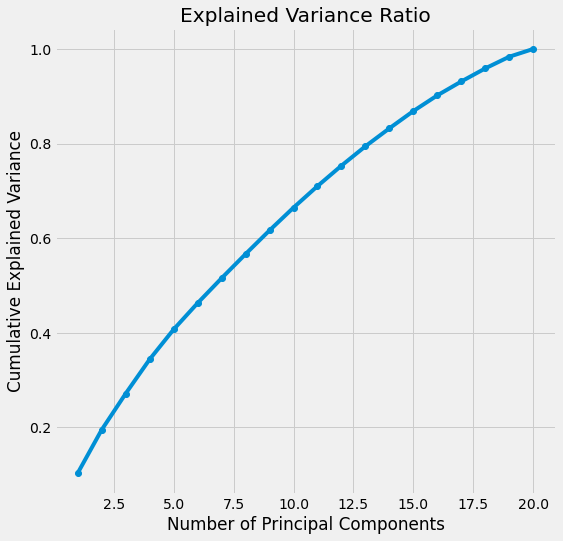

In [58]:
numerical_features = hotel_df.select_dtypes(include=['float64', 'int64'])

# Standardize the data (important for PCA)
scaler = StandardScaler()
numerical_features_standardized = scaler.fit_transform(numerical_features)

# Apply PCA
pca = PCA()
pca_result = pca.fit_transform(numerical_features_standardized)

# Plot explained variance ratio
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_.cumsum(), marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance Ratio')
plt.show()

# Choose the number of components based on the plot or a desired threshold
n_components = 2  # You can adjust this based on your analysis

# Apply PCA with the chosen number of components
pca = PCA(n_components=n_components)
pca_result = pca.fit_transform(numerical_features_standardized)



# Create a DataFrame with the PCA results
pca_df = pd.DataFrame(data=pca_result, columns=[f'PC{i}' for i in range(1, n_components + 1)])

# Concatenate the PCA results with the original data
#result_data = pd.concat([data, pca_df], axis=1)
result_data = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])



In [59]:
# Display the result_data DataFrame
print(result_data.head())

        PC1       PC2
0 -1.236227 -1.282240
1 -0.424592 -2.426711
2 -1.911630 -0.619693
3 -1.303940 -0.260618
4 -0.319256  0.223291


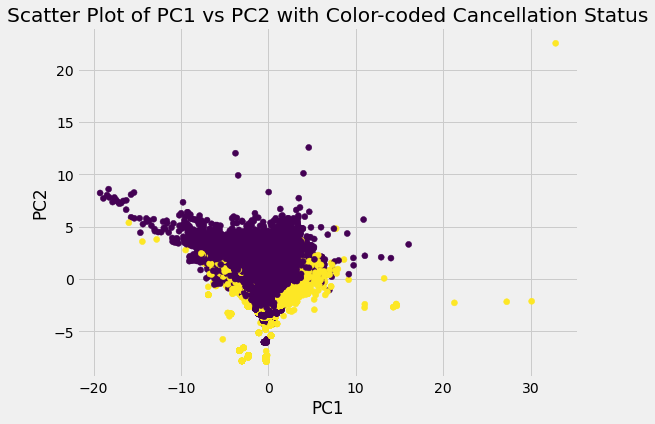

In [60]:
plt.figure(figsize=(8,6))
plt.scatter(result_data['PC1'], result_data['PC2'], c=booking_data_dummies['is_canceled'])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Scatter Plot of PC1 vs PC2 with Color-coded Cancellation Status')
plt.show()

In [61]:
X = pca_df.values
y = hotel_df['is_canceled']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [62]:
# KNN model
model_k = KNN(n_neighbors=4)
model_k.fit(X_train, y_train)
y_pred = model_k.predict(X_test)

# Model evaluation
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy of KNN:', accuracy)

Accuracy of KNN: 0.8487123563459441


For Bibliography & References refrer to the report.